# Instructions
In this project you are given a large set of training data points, or training instances. Some of them are created by one Guassian distributed and the rest are generated by another Gaussian distribution with different parameters.

Your task is to find the decision boundary by using this training data set.  

Consider the following:
* Each blob belongs to one label, and each label is a set of instances with a two dimensional feature vector.
* You need to estimate the mean and the covariance matrix for the instances that are given, using the material described in the class and repeated above.
* We also follow the methodology of the Naive Bayesian case (in this project $P(\omega_1) = P(\omega_2)$ )and we only estimate the diagonal elements of the covariance matrix, so we assume that the off diagonal elements are zero. This means that the features are independent from each other; this makes their estimation easier, because --- being independent --- you can estimate their means and variances independently.
* Additionally, we make sure that the two covariance matricies that are estimated for the two labels are identical, so $\Sigma_1=\Sigma_2$. Since each data set will give you a slightly different ML estimate of $\Sigma$, you can estimate them independently and then take an arithemtic average of the two estimates at the end, and then choose the average value for both labels. **NOTE:** If the two covraiance matrices are not the same for both blobs, then the boundary will not be a line, but rather a curve.
* Once you have estimated the parameters of the features for the two Gaussian distributed labels, you can use the code similar to the one we had in Project 3 to plot the decision boundary.
* Make sure that the decision boundary is linear.

Use ML to estimate the two mean vectors, $\mu_1$ and $\mu_2$, and the covariance matrix, $\Sigma$, for generated data. Find and plot decision boundary.

mu0:  [-3.89791289 -4.72871334]
mu1:  [-6.02745615 -1.34040907]
covariance matrix:  [0.90529548 0.96998408]


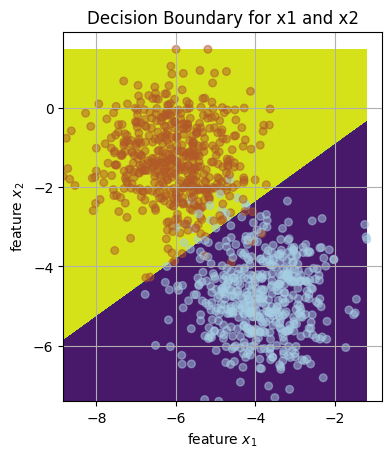

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate Data
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std= 1,random_state=1001)

#ML Estimates for mu1, mu2, sigma
index_0 = np.where(y == 0)[0]
index_1 = np.where(y == 1)[0]

mu_0 = np.mean(X[index_0,:], axis = 0)
mu_1 = np.mean(X[index_1,:], axis = 0)
var_0 = np.var(X[index_0,:], axis = 0)
var_1 = np.var(X[index_1,:], axis = 0)

Sigma = (var_0 + var_1)/2 #Ensure variances are equal for naive bayes

#Determine Decision Boundary
MU = np.vstack((mu_0, mu_1))
resolution = .01
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx
N=2
prob = np.ones(N) *1/N
max = np.ones(xx.shape)* (-1e20)
for n in np.arange(N):
      metric = np.log(prob[n]) -  np.log(2*np.pi) -1/2*np.log((Sigma[0])* (Sigma[1])) \
      - (np.square(xx - MU[n,0])/np.square(Sigma[0]) + np.square(yy-MU[n,1])/np.square(Sigma[1]))/2

      h  = h* ((metric<max) *1.) + ((metric >= max) *1.) *(n+1)
      max = max * ((metric<max)*1.) + ((metric >= max)*1.) *metric

#Graph
plt.contourf(xx[0,:],yy[:,0],h)
plt.scatter(X[:, 0], X[:, 1],  c=y , s=30, cmap=plt.cm.Paired, alpha = 0.5)
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Decision Boundary for x1 and x2')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

print('mu0: ', mu_0)
print('mu1: ', mu_1)
print('covariance matrix: ', Sigma)